In [1]:
import pandas as pd

In [2]:
# Read dataset2 csv
dataset2 = pd.read_csv('data/Dataset2.csv')

## Preprocessing of datetime

In [3]:
# Convert DateTime column to datetime format
dataset2['DateTime'] = pd.to_datetime(dataset2['DateTime'])

# Create a column for the date
dataset2['Date'] = dataset2['DateTime'].dt.date

# Create new columns for year, month, day, hour, minute, second
dataset2['Year'] = dataset2['DateTime'].dt.year
dataset2['Month'] = dataset2['DateTime'].dt.month
dataset2['Day'] = dataset2['DateTime'].dt.day
dataset2['Hour'] = dataset2['DateTime'].dt.hour
# dataset2['Minute'] = dataset2['DateTime'].dt.minute

# Create new column for day of week
dataset2['DayOfWeek'] = dataset2['DateTime'].dt.dayofweek
dataset2['DayOfWeek'] = dataset2['DayOfWeek'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                           4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Create new column for time of day
dataset2['TimeOfDay'] = dataset2['Hour'].apply(lambda x: 'Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))
dataset2['MonthName'] = dataset2['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                       5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                       9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [4]:
# Create new column for season
dataset2['Season'] = dataset2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

In [5]:
dataset2

,StoreId,DateTime,InvoiceGlobalId,Subcategory,Quantity,Revenue,Date,Year,Month,Day,Hour,DayOfWeek,TimeOfDay,MonthName,Season
0,8537,2023-10-17 22:05:19,8412_452536,GREEK COFFEE,1,2.2,2023-10-17,2023,10,17,22,Tuesday,Evening,October,Fall
1,4099,2023-10-08 19:06:09,4099_1277028,RYO,4,30.8,2023-10-08,2023,10,8,19,Sunday,Evening,October,Fall
2,8537,2023-10-18 20:33:00,8412_452839,ENERGY DRINK,1,0.8,2023-10-18,2023,10,18,20,Wednesday,Evening,October,Fall
3,6748,2023-10-12 08:36:31,6748_853300,TOBACCO ACCESSORIES,2,0.9,2023-10-12,2023,10,12,8,Thursday,Morning,October,Fall
4,4099,2023-10-18 18:10:06,4099_1282071,JELLIES,3,3.3,2023-10-18,2023,10,18,18,Wednesday,Evening,October,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219219,8537,2023-10-07 20:03:42,8412_448618,ENERGY DRINK,1,1.5,2023-10-07,2023,10,7,20,Saturday,Evening,October,Fall
219220,10130,2023-10-07 23:24:52,8505_716266,NIBBLES,1,1.2,2023-10-07,2023,10,7,23,Saturday,Evening,October,Fall
219221,7385,2023-10-31 18:25:20,7385_404476,LONG LIFE JUICE,1,2.1,2023-10-31,2023,10,31,18,Tuesday,Evening,October,Fall
219222,10502,2023-11-03 20:59:57,8553_262736,DIGESTIVE,1,2.2,2023-11-03,2023,11,3,20,Friday,Evening,November,Fall


## Exploratory Data Analysis

In [6]:
# Group by month,day,hour and InvoiceGlobalID
grouped_data = dataset2.groupby(['DayOfWeek', 'Hour']).agg({
    'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
    'Revenue': 'sum'      # Summing up the revenue per group
}).reset_index()


In [7]:
grouped_data

,DayOfWeek,Hour,InvoiceGlobalId,Revenue
0,Friday,0,401,2746.10
1,Friday,1,294,1925.40
2,Friday,2,188,1181.30
3,Friday,3,113,669.60
4,Friday,4,79,422.30
...,...,...,...,...
163,Wednesday,19,1528,9989.28
164,Wednesday,20,1562,10277.64
165,Wednesday,21,1475,10764.58
166,Wednesday,22,1216,8107.82


### Create a heatmap of the number of transactions per day and hour

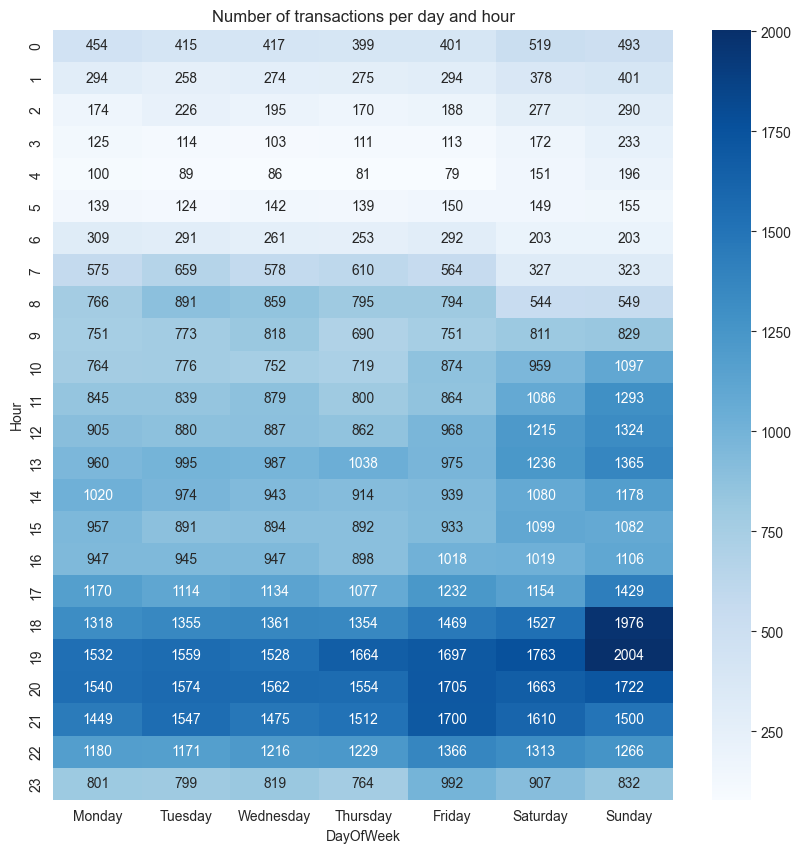

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table and sort the columns by day of week for month 10
pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='InvoiceGlobalId').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
plt.figure(figsize=(10, 10))
# Make the cmap to be a gradient of blue but for the lowest value to be white
cmap = 'Blues'
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
plt.title('Number of transactions per day and hour')
plt.show()

### Create a heatmap of the revenue per day and hour

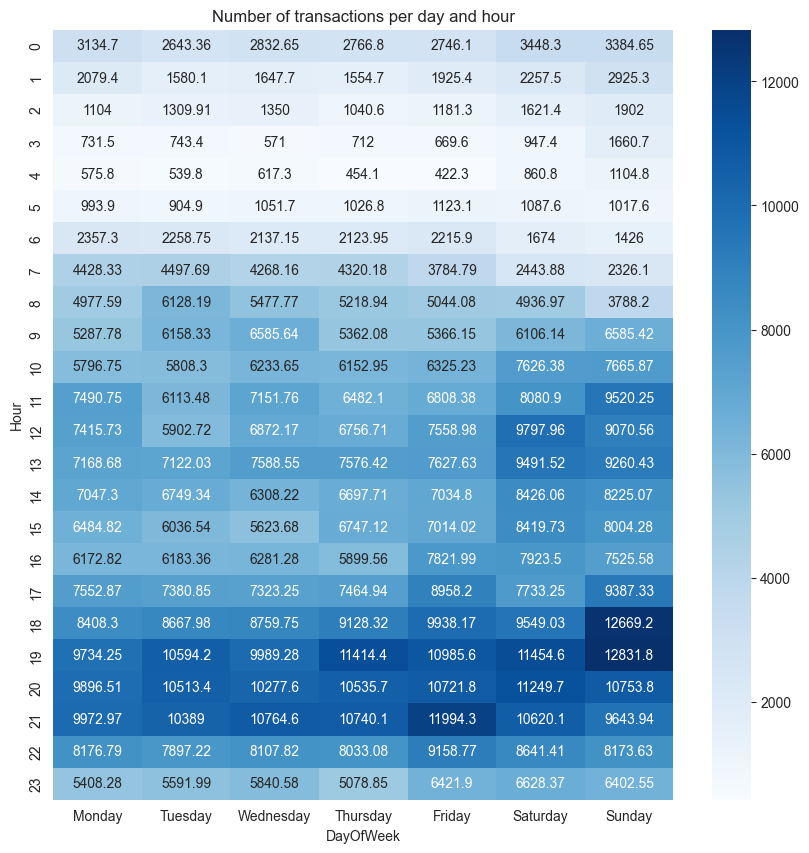

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table and sort the columns by day of week for month 10
pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='Revenue').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
plt.figure(figsize=(10, 10))
# Make the cmap to be a gradient of blue but for the lowest value to be white
cmap = 'Blues'
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
plt.title('Number of transactions per day and hour')
plt.show()

In [10]:
# Sum up the revenue per day of week 
revenue_per_day = dataset2.groupby('DayOfWeek')['Revenue'].sum().reset_index(name='Revenue')
revenue_per_day

,DayOfWeek,Revenue
0,Friday,142848.56
1,Monday,132397.12
2,Saturday,151026.55
3,Sunday,155255.05
4,Thursday,133288.13
5,Tuesday,131714.89
6,Wednesday,133661.28


### Create a bar plot of the revenue per day of week

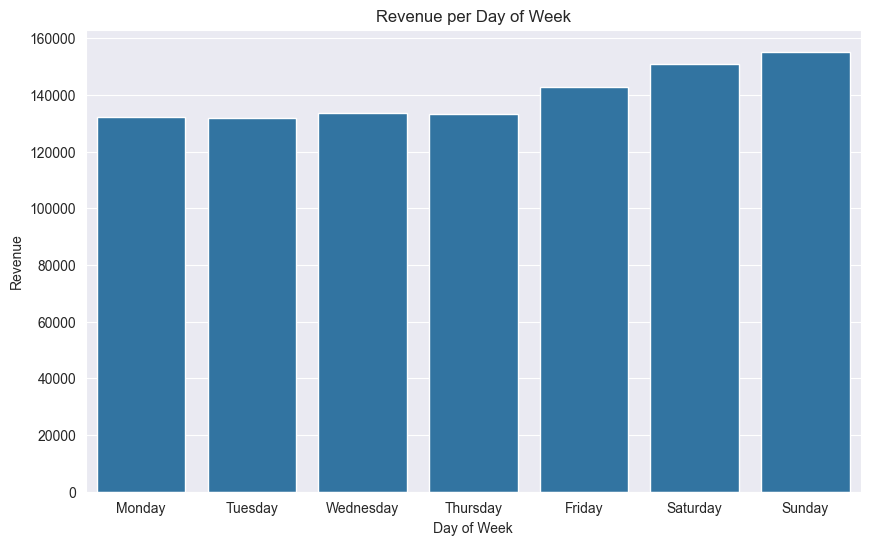

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Make the days of week to be in the correct order
revenue_per_day['DayOfWeek'] = pd.Categorical(revenue_per_day['DayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_per_day, x='DayOfWeek', y='Revenue')
plt.title('Revenue per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.show()

### Create a line plot of the number of transactions per hour

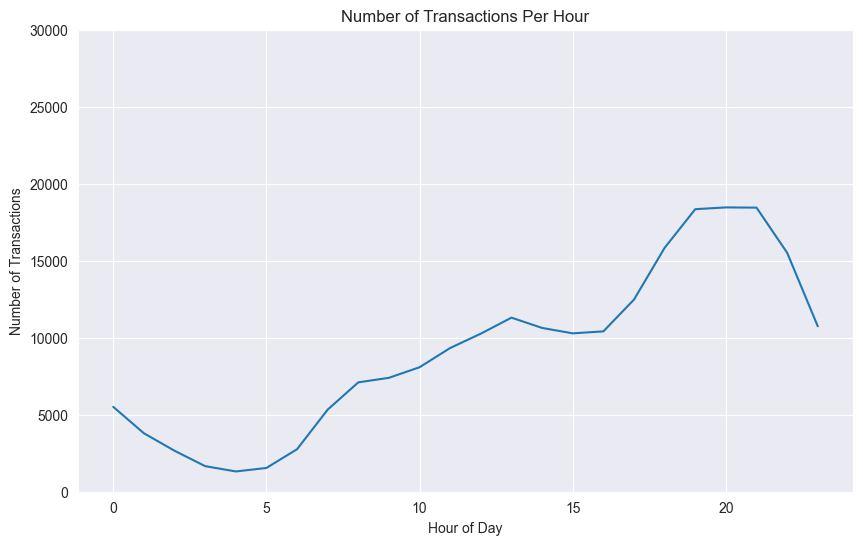

In [12]:
transactions_per_hour = dataset2.groupby('Hour').size()

# Reset index to use 'Hour' as a column in the plot
transactions_per_hour = transactions_per_hour.reset_index(name='Transaction Count')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_per_hour, x='Hour', y='Transaction Count')
plt.title('Number of Transactions Per Hour')
plt.xlabel('Hour of Day')
plt.ylim(0,30000)
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [13]:
transactions_per_day = dataset2.groupby('Date').agg({
    'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
    'Revenue': 'sum'      # Summing up the revenue per group
}).reset_index()
transactions_per_day

,Date,InvoiceGlobalId,Revenue
0,2023-10-02,3883,26166.10
1,2023-10-03,4058,27213.29
2,2023-10-04,3855,26860.65
3,2023-10-05,3926,26959.29
4,2023-10-06,3970,28028.15
5,2023-10-07,4144,29879.74
6,2023-10-08,4500,30682.27
7,2023-10-09,3768,26341.14
8,2023-10-10,3882,27273.94
9,2023-10-11,3914,27356.75


In [14]:
# Group by InvoiceGlobalId and get the sum of revenue
revenue_per_day = dataset2.groupby(['InvoiceGlobalId', 'DayOfWeek'])['Revenue'].sum().reset_index(name='Revenue')
revenue_per_day

,InvoiceGlobalId,DayOfWeek,Revenue
0,4099_1273451,Monday,12.3
1,4099_1273452,Monday,7.8
2,4099_1273453,Monday,4.0
3,4099_1273455,Monday,1.1
4,4099_1273456,Monday,5.1
...,...,...,...
140612,8553_263646,Sunday,1.2
140613,8553_263647,Sunday,8.6
140614,8553_263648,Sunday,1.8
140615,8553_263649,Sunday,15.1


In [15]:
# Calculate the average revenue per transaction per day of week
avg_revenue_per_day = revenue_per_day.groupby('DayOfWeek')['Revenue'].mean().reset_index(name='Average Revenue')
avg_revenue_per_day

,DayOfWeek,Average Revenue
0,Friday,7.016827
1,Monday,6.940871
2,Saturday,7.136686
3,Sunday,6.795721
4,Thursday,7.089794
5,Tuesday,6.839134
6,Wednesday,6.991750


In [16]:
# Calculate the sum of revenue per day of week
revenue_per_day = dataset2.groupby('DayOfWeek')['Revenue'].sum().reset_index(name='Revenue')
revenue_per_day

,DayOfWeek,Revenue
0,Friday,142848.56
1,Monday,132397.12
2,Saturday,151026.55
3,Sunday,155255.05
4,Thursday,133288.13
5,Tuesday,131714.89
6,Wednesday,133661.28


In [17]:
# Get the total revenue
total_revenue = dataset2['Revenue'].sum()
total_revenue

980191.5799999998

In [18]:
# Get the average revenue 
avg_revenue = dataset2['Revenue'].mean()
avg_revenue

4.471187369995985